#### Part1. 기본학습 - AI 핵심이론 및 활용     
    chp09 - 비지도 학습  
    


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
#### 차원축소 : 데이터의 중요한 특성만 남기고, 불필요한 특성의 갯수는 줄이는 방법 
- 1) 특성선택 (feature selection) : 훈련에 가장 유용한 특성을 선택. 원본 데이터에서 가장 좋은 성능을 낼 수 있는 데이터의 부분집합을 찾는다. 
- 2) 특성추출 (feature extraction) : 기존특성을 반영해 저차원의 중요 특성으로 압축. 주어진 데이터를 더 잘 설명할 수 있는 새로운 특성을 추출한다. 
---

##### 주성분 분석(PCA) 
- 분산을 최대한 유지하면서, 특성이 많은 데이터의 차원을 줄이는 방법
- 원본의 분산을 최대한 보존하는 새로운 축을 찾고, 그 축에 데이터를 투영(projection) 한다. 
- 차원 축소의 장점으로, 시각화와 노이즈 제거에 유용하다. 
- 일반적으로 주성분 분석결과 누적기여율 80~90%를 차지하는 주성분들로 개수를 선택함 

(1000, 10) (1000,)


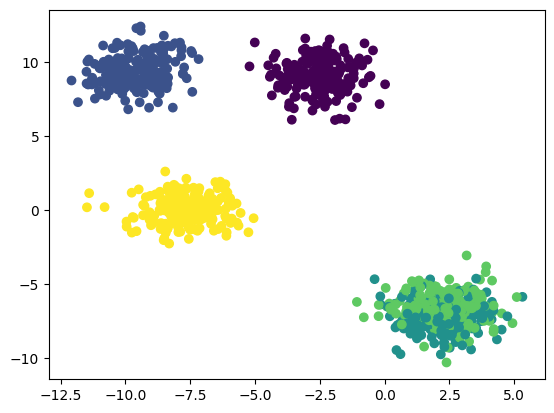

In [8]:
# PCA 실습 
## 데이터 생성 
from sklearn.datasets import make_blobs   ## make_blobs : 지정한 샘플/피처/클러스터 갯수에 따라 데이터를 생성 
x, y = make_blobs(n_features = 10,        ## 10개의 피처(차원)
                  n_samples = 1000,       ## 1천개의 데이터 
                  centers = 5,            ## 5개의 클러;스터
                  random_state = 42, 
                  cluster_std = 1         ## 클러스터의 표준편차=1 
                  )

print(x.shape, y.shape)

plt.scatter(x[:, 0], x[:, 1], c=y)        ## x의 1번째 컬럼을 가로축, 2번째 컬럼을 y축, y값을 클러스터 색상으로 지정
plt.show()

In [9]:
## 데이터를 평균0, 표준편차1로 표준화 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)                   ## x의 평균,표준편차 계산 
std_data = scaler.transform(x)  ## 계산된 평균, 표준편차 적용하여 표준화(평균=0, std=1로 변환)

std_data                        ## 10개의 features 모두 표준화된 데이터 

array([[ 1.17767515, -1.06364935, -0.26518223, ..., -0.14284726,
        -0.72458706, -1.30024086],
       [ 0.17247901,  1.21995507,  0.71782164, ...,  1.52328017,
        -0.04571973,  1.58001197],
       [ 0.26632577,  1.20910851,  1.1892965 , ...,  1.2641021 ,
         0.24260128,  1.432454  ],
       ...,
       [ 0.0964581 ,  1.1982299 ,  0.84685284, ...,  1.92897007,
        -0.00993031,  1.4782557 ],
       [ 1.08483844, -1.53497868, -1.08247792, ..., -1.32453853,
         0.5152353 ,  0.52896534],
       [-1.22702753,  1.23380516,  1.37666797, ..., -0.33631828,
        -1.38527107,  0.28060398]])

In [ ]:
## PCA 실행 
from sklearn.decomposition import PCA 
pca = PCA(n_components=10)               ## 우선 임의로 주성분 갯수를 10개로 지정
reduced_data = pca.fit_transform(std_data)

pca_df = pd.DataFrame(reduced_data)
print(pca_df.shape)
pca_df.head()

(1000, 10)


,0,1,2,3,4,5,6,7,8,9
0,1.016080,-0.379115,-2.225330,0.390119,-1.008068,-0.247914,0.194653,-0.104234,0.210475,-0.004677
1,-2.436353,1.792818,0.481535,0.113002,-0.147152,0.678499,0.052116,0.265773,-0.173242,0.211265
2,-2.415221,2.210409,0.040943,0.150343,-0.162912,0.058407,0.164824,-0.013066,0.340750,-0.008937
3,3.859119,1.005901,0.798367,-0.788226,0.804871,-0.178634,0.077883,0.206442,0.154884,-0.034474
4,-2.598484,1.685481,0.489594,0.049152,-0.313102,0.833289,-0.009843,0.052769,-0.093530,0.060685


In [15]:
## pca 실행결과 각 변수들의 explained variance 확인 
print('Explained Variance = ', pca.explained_variance_)
print('-'*100)
print('Explained Variance Ratio = ', pca.explained_variance_ratio_)

Explained Variance =  [5.46858953 2.14628709 1.15340172 0.78921545 0.21972378 0.11602635
 0.03643478 0.03307804 0.02565011 0.02160316]
----------------------------------------------------------------------------------------------------
Explained Variance Ratio =  [0.54631209 0.21441408 0.11522483 0.07884262 0.02195041 0.01159103
 0.00363983 0.0033045  0.00256245 0.00215816]


In [19]:
## 누적 기여율 구하기 
pca_result = pd.DataFrame({'VAR': pca.explained_variance_, 
                           'VAR_%' : pca.explained_variance_ratio_},
                           )
pca_result['Cum_VAR_%'] = pca_result['VAR_%'].cumsum()
pca_result

,VAR,VAR_%,Cum_VAR_%
0,5.468590,0.546312,0.546312
1,2.146287,0.214414,0.760726
2,1.153402,0.115225,0.875951
3,0.789215,0.078843,0.954794
4,0.219724,0.021950,0.976744
5,0.116026,0.011591,0.988335
6,0.036435,0.003640,0.991975
7,0.033078,0.003304,0.995279
8,0.025650,0.002562,0.997842
9,0.021603,0.002158,1.000000


- 보통 설명된 분산값이 0.7 이상(중요도가 높은 변수), 누적기여율 0.8~0.9 이상(전체를 충분히 설명)일때 적절 주성분 갯수로 판단 
- 위 결과에서는 3번까지, 즉 4개의 주성분이 가장 적절한 것으로 판단됨 

In [ ]:
## 보통 주성분 갯수 지정방식이 아닌, 보존하려는 분산비율을 설정한다. 
pca2 = PCA(n_components=0.9)     ## 90% 이상의 설명력을 가지도록 주성분 분석을 시행하라 
reduced_data2 = pca2.fit_transform(std_data)

pca2_result = pd.DataFrame({'VAR': pca2.explained_variance_, 
                           'VAR_%' : pca2.explained_variance_ratio_},
                           )
pca2_result['Cum_VAR_%'] = pca2_result['VAR_%'].cumsum()
pca2_result

,VAR,VAR_%,Cum_VAR_%
0,5.468590,0.546312,0.546312
1,2.146287,0.214414,0.760726
2,1.153402,0.115225,0.875951
3,0.789215,0.078843,0.954794


---

#### t-sne 
- 확률적 이웃 임베딩, 복잡한 데이터를 2차원 또는 3차원으로 축소 
- PCA가 선병 변환에 의한 차원축소인데 반해, t-sne는 비선형적 방법 
- 비선형 차원축소이므로, 표현력 증가와 클래스간 분별력있게 시각화 해주는 장점 존재 

(100, 10) (100,)


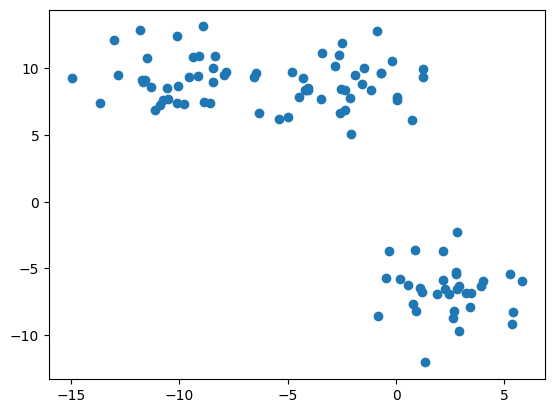

In [ ]:
##data 
from sklearn.datasets import make_blobs
x,y = make_blobs(n_features=10, 
                 n_samples=100,
                 centers=3, 
                 random_state=42,
                 cluster_std=2
                 )
print(x.shape, y.shape)

plt.scatter(x[:,0], x[:,1])
plt.show()

In [26]:
## 2차원 t-sne
from sklearn.manifold import TSNE
tsne_np = TSNE(n_components=2, 
               random_state=42
               ).fit_transform(x)

tsne_df = pd.DataFrame(tsne_np, columns=['component 0', 'component 1'])
print(tsne_df.shape)
display(tsne_df.head()) 

(100, 2)


,component 0,component 1
0,-18.087502,1.240942
1,-18.914812,1.397845
2,-19.070858,1.543947
3,7.312888,-6.433980
4,9.035783,4.388275


(33, 3)

,component 0,component 1,target
0,-18.087502,1.240942,2
1,-18.914812,1.397845,2
2,-19.070858,1.543947,2
5,-19.038584,1.188909,2
8,-18.944715,1.768453,2


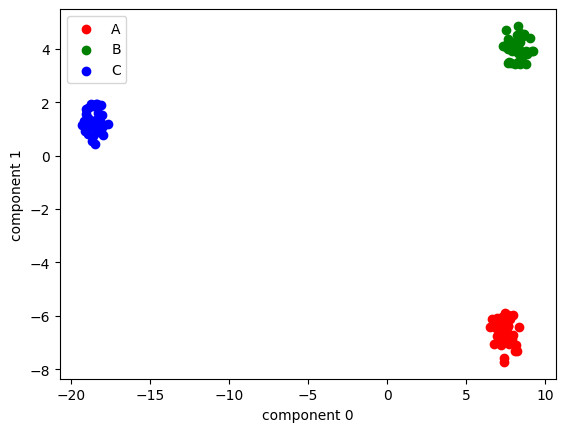

In [35]:
## tsne_df에 y컬럼을 붙인 후, y값(0,1,2)에 따라 분리 
tsne_df['target'] = y

tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]

#display(tsne_df_0.shape, tsne_df_0.head())
#display(tsne_df_1.shape, tsne_df_1.head())
display(tsne_df_2.shape, tsne_df_2.head())

## 시각화 
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'red', label='A')
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color = 'green', label='B')
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], color = 'blue', label='C')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

In [36]:
## 3차원 t-sne 
tsne_np2 = TSNE(n_components=3, 
               random_state=42
               ).fit_transform(x)

tsne_df2 = pd.DataFrame(tsne_np2, columns=['component 0', 'component 1', 'component 2'])
print(tsne_df2.shape)
display(tsne_df2.head()) 

(100, 3)


,component 0,component 1,component 2
0,0.550070,92.270073,-61.459248
1,-12.539781,26.270184,-92.373787
2,-25.971306,74.281952,-9.905911
3,9.901919,26.575871,59.841175
4,-15.458657,-107.394814,34.580700


(33, 4)

,component 0,component 1,component 2,target
0,0.550070,92.270073,-61.459248,2
1,-12.539781,26.270184,-92.373787,2
2,-25.971306,74.281952,-9.905911,2
5,-32.892689,41.996708,14.015662,2
8,-4.966656,100.840714,-22.936056,2


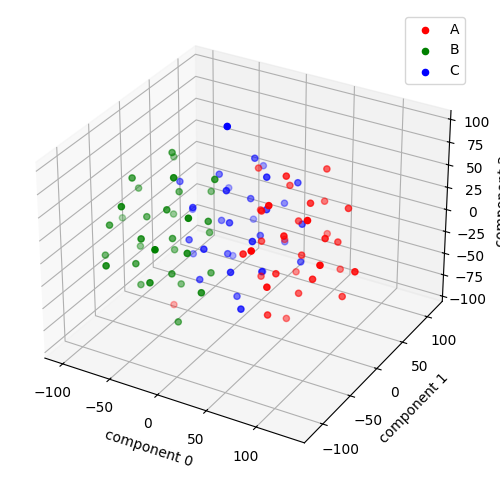

In [39]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection = '3d')

tsne_df2['target'] = y
tsne_df2_0 = tsne_df2[tsne_df2['target']==0]
tsne_df2_1 = tsne_df2[tsne_df2['target']==1]
tsne_df2_2 = tsne_df2[tsne_df2['target']==2]

display(tsne_df2_2.shape, tsne_df2_2.head())

ax.scatter(tsne_df2_0['component 0'],
           tsne_df2_0['component 1'],
           tsne_df2_0['component 2'],
           color = 'red', label = 'A'
           )
ax.scatter(tsne_df2_1['component 0'],
           tsne_df2_1['component 1'],
           tsne_df2_1['component 2'],
           color = 'green', label = 'B'
           )
ax.scatter(tsne_df2_2['component 0'],
           tsne_df2_2['component 1'],
           tsne_df2_2['component 2'],
           color = 'blue', label = 'C'
           )

ax.set_xlabel('component 0')
ax.set_ylabel('component 1')
ax.set_zlabel('component 2')
ax.legend()
plt.show()